In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import gekko
import scipy as sp
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import matplotlib.tri as mtri

In [2]:
#Patch1
theta_x = -60
theta_y = 15
theta_z = -25
x = np.array((0,1,2,0.4,1.2,2.4,0.4,1.4,2.4))
y = np.array((0.1,0.4,0.3,1.1,1.6,1.5,2,2.3,2.6))
z = np.array((0,0.3,0.5,0.3,1.7,0.7,1.1,1.7,1.5))
f1 = np.sin([theta_x,theta_y,theta_z])
f2 = np.cos([theta_x,theta_y,theta_z])
#Rotational Vectors
R_x = np.array(((1,0,0,0),(0,f2[0],-f1[0],0),(0,f1[0],f2[0],0),(0,0,0,1)))
R_y = np.array(((f2[1],0,f1[1],0),(0,1,0,0),(-f1[1],0,f2[1],0),(0,0,0,1)))
R_z = np.array(((f2[2],-f1[2],0,0),(f1[2],f2[2],0,0),(0,0,1,0),(0,0,0,1)))
R_yz = np.matmul(R_y,R_z)
R_xyz = np.matmul(R_x,R_yz)
P1 = (x[0],y[0],z[0])
T_1 = ([P1[0]],[P1[1]],[P1[2]],[1])
P1 = np.matmul(R_xyz,T_1)[0:3,:]
P2 = (x[1],y[1],z[1])
T_2 = ([P2[0]],[P2[1]],[P2[2]],[1])
P2 = np.matmul(R_xyz,T_2)[0:3,:]
P3 = (x[2],y[2],z[2])
T_3 = ([P3[0]],[P3[1]],[P3[2]],[1])
P3 = np.matmul(R_xyz,T_3)[0:3,:]
P4 = (x[3],y[3],z[3])
T_4 = ([P4[0]],[P4[1]],[P4[2]],[1])
P4 = np.matmul(R_xyz,T_4)[0:3,:]
P5 = (x[4],y[4],z[4])
T_5 = ([P5[0]],[P5[1]],[P5[2]],[1])
P5 = np.matmul(R_xyz,T_5)[0:3,:]
P6 = (x[5],y[5],z[5])
T_6 = ([P6[0]],[P6[1]],[P6[2]],[1])
P6 = np.matmul(R_xyz,T_6)[0:3,:]
P7 = (x[6],y[6],z[6])
T_7 = ([P7[0]],[P7[1]],[P7[2]],[1])
P7 = np.matmul(R_xyz,T_7)[0:3,:]
P8 = (x[7],y[7],z[7])
T_8 = ([P8[0]],[P8[1]],[P8[2]],[1])
P8 = np.matmul(R_xyz,T_8)[0:3,:]
P9 = (x[8],y[8],z[8])
T_9 = ([P9[0]],[P9[1]],[P9[2]],[1])
P9 = np.matmul(R_xyz,T_9)[0:3,:]
P = np.array((P1,P2,P3,P4,P5,P6,P7,P8,P9))

#Patch2
theta_x_1 = -50
theta_y_1 = -30
theta_z_1 = 15
x1 = np.array((-2,-1,0,1.0,2.0,-2.2,-1.1,0.0,1.1,2.2,-2.8,-1.3,0.0,1.3,2.8))
y1 = np.array((-1.4,-1.1,-1,-1.1,-1.4,0.0,0.0,0.0,0.0,0.0,1.4,1.1,1.0,1.1,1.4))
z1 = np.array((1.0,0.2,0.0,-0.2,-1.0,0.8,0.0,-0.2,-0.4,-1.2,0.4,-0.2,-0.4,-0.6,-1.6))
f3 = np.sin([theta_x_1,theta_y_1,theta_z_1])
f4 = np.cos([theta_x_1,theta_y_1,theta_z_1])
#Rotational Vector
R_x_1 = np.array(((1,0,0,0),(0,f4[0],-f3[0],0),(0,f3[0],f4[0],0),(0,0,0,1)))
R_y_1 = np.array(((f4[1],0,f3[1],0),(0,1,0,0),(-f3[1],0,f4[1],0),(0,0,0,1)))
R_z_1 = np.array(((f4[2],-f3[2],0,0),(f3[2],f4[2],0,0),(0,0,1,0),(0,0,0,1)))
R_yz_1 = np.matmul(R_y_1,R_z_1)
R_xyz_1 = np.matmul(R_x_1,R_yz_1)
P.shape

(9, 3, 1)

In [3]:
c1 = 6
c2 = -6
a1 = 0
a2 = 1
a3 = 2

In [4]:
i = 1
j = 3
X1 = P[i-1][a1]
Y1= P[j-1][a1]
p1 = c2*X1
q1 = c1*Y1
r1 = c1*X1
s1 = c2*Y1
B = np.array(([p1 + q1],[r1 + s1]))
A = np.array(([-4,-2],[-2,4]))
A_inverse = np.linalg.inv(A)
X1_f = B[0]*A_inverse[0][0] + B[1]*A_inverse[0][1]
X3_f = B[0]*A_inverse[1][0] + B[1]*A_inverse[1][1]
X2 = P[i-1][a2]
Y2 = P[j-1][a2]
p2 = c2*X2
q2 = c1*Y2
r2 = c1*X2
s2 = c2*Y2
B = np.array(([p2 + q2],[r2 + s2]))
A = np.array(([-4,-2],[-2,4]))
A_inverse = np.linalg.inv(A)
Y1_f = B[0]*A_inverse[0][0] + B[1]*A_inverse[0][1]
Y3_f = B[0]*A_inverse[1][0] + B[1]*A_inverse[1][1]
X2 = P[i-1][a3]
Y2 = P[j-1][a3]
p3 = c2*X2
q3 = c1*Y2
r3 = c1*X2
s3 = c2*Y2
B = np.array(([p3 + q3],[r3 + s3]))
A = np.array(([-4,-2],[-2,4]))
A_inverse = np.linalg.inv(A)
Z1_f = B[0]*A_inverse[0][0] + B[1]*A_inverse[0][1]
Z3_f = B[0]*A_inverse[1][0] + B[1]*A_inverse[1][1]
#Point 1
P1_f = np.array(([X1_f],[Y1_f],[Z1_f]))
T_1 = ([P1_f[0]],[P1_f[1]],[P1_f[2]],[1])
P1_f = np.matmul(R_xyz,T_1)[0:3,:]
#Point 3
P3_f = np.array(([X3_f],[Y3_f],[Z3_f]))
T_3 = ([P3_f[0]],[P3_f[1]],[P3_f[2]],[1])
P3_f = np.matmul(R_xyz,T_3)[0:3,:]

In [5]:
i = 4
j = 6
X = P[i-1][a1]
Y = P[j-1][a1]
p = c2*X
q = c1*Y
r = c1*X
s = c2*Y
B = np.array(([p + q],[r + s]))
A = np.array(([-4,-2],[-2,4]))
A_inverse = np.linalg.inv(A)
X4_f = B[0]*A_inverse[0][0] + B[1]*A_inverse[0][1]
X6_f = B[0]*A_inverse[1][0] + B[1]*A_inverse[1][1]
X2 = P[i-1][a2]
Y2 = P[j-1][a2]
p2 = c2*X2
q2 = c1*Y2
r2 = c1*X2
s2 = c2*Y2
B = np.array(([p2 + q2],[r2 + s2]))
A = np.array(([-4,-2],[-2,4]))
A_inverse = np.linalg.inv(A)
Y4_f = B[0]*A_inverse[0][0] + B[1]*A_inverse[0][1]
Y6_f = B[0]*A_inverse[1][0] + B[1]*A_inverse[1][1]
X2 = P[i-1][a3]
Y2 = P[j-1][a3]
p3 = c2*X2
q3 = c1*Y2
r3 = c1*X2
s3 = c2*Y2
B = np.array(([p3 + q3],[r3 + s3]))
A = np.array(([-4,-2],[-2,4]))
A_inverse = np.linalg.inv(A)
Z4_f = B[0]*A_inverse[0][0] + B[1]*A_inverse[0][1]
Z6_f = B[0]*A_inverse[1][0] + B[1]*A_inverse[1][1]
#Point 6
P6_f = np.array(([X6_f],[Y6_f],[Z6_f]))
T_6 = ([P6_f[0]],[P6_f[1]],[P6_f[2]],[1])
P6_f = np.matmul(R_xyz,T_6)[0:3,:]
#Point 4
P4_f = np.array(([X4_f],[Y4_f],[Z4_f]))
T_4 = ([P4_f[0]],[P4_f[1]],[P4_f[2]],[1])
P4_f = np.matmul(R_xyz,T_4)[0:3,:]

In [6]:
#Curvature at end points assumption (Double Derivate equated to zero)
i = 7
j = 9
X = P[i-1][a1]
Y = P[j-1][a1]
p = c2*X
q = c1*Y
r = c1*X
s = c2*Y
B = np.array(([p + q],[r + s]))
A = np.array(([-4,-2],[-2,4]))
A_inverse = np.linalg.inv(A)
X7_f = B[0]*A_inverse[0][0] + B[1]*A_inverse[0][1]
X9_f = B[0]*A_inverse[1][0] + B[1]*A_inverse[1][1]
X2 = P[i-1][a2]
Y2 = P[j-1][a2]
p2 = c2*X2
q2 = c1*Y2
r2 = c1*X2
s2 = c2*Y2
B = np.array(([p2 + q2],[r2 + s2]))
A = np.array(([-4,-2],[-2,4]))
A_inverse = np.linalg.inv(A)
Y7_f = B[0]*A_inverse[0][0] + B[1]*A_inverse[0][1]
Y9_f = B[0]*A_inverse[1][0] + B[1]*A_inverse[1][1]
X2 = P[i-1][a3]
Y2 = P[j-1][a3]
p3 = c2*X2
q3 = c1*Y2
r3 = c1*X2
s3 = c2*Y2
B = np.array(([p3 + q3],[r3 + s3]))
A = np.array(([-4,-2],[-2,4]))
A_inverse = np.linalg.inv(A)
Z7_f = B[0]*A_inverse[0][0] + B[1]*A_inverse[0][1]
Z9_f = B[0]*A_inverse[1][0] + B[1]*A_inverse[1][1]
#Point 7
P7_f = np.array(([X7_f],[Y7_f],[Z7_f]))
T_7 = ([P7_f[0]],[P7_f[1]],[P7_f[2]],[1])
P7_f = np.matmul(R_xyz,T_7)[0:3,:]
#Point 9
P9_f = np.array(([X9_f],[Y9_f],[Z9_f]))
T_9 = ([P3_f[0]],[P3_f[1]],[P3_f[2]],[1])
P9_f = np.matmul(R_xyz,T_9)[0:3,:]

In [7]:
#Point 2
X2_f = 0.25*((-3*x[0]) + (3*x[2]) - X1_f - X3_f)
Y2_f = 0.25*((-3*y[0]) + (3*y[2]) - Y1_f - Y3_f)
Z2_f = 0.25*((-3*z[0]) + (3*z[2]) - Z1_f - Z3_f)
P2_f = np.array(([X2_f],[Y2_f],[Z2_f]))
T_2 = ([P2_f[0]],[P2_f[1]],[P2_f[2]],[1])
P2_f = np.matmul(R_xyz,T_2)[0:3,:]
#Point 5
X5_f = 0.25*((-3*x[3]) + (3*x[5]) - X6_f - X4_f)
Y5_f = 0.25*((-3*y[3]) + (3*y[5]) - Y6_f - Y4_f)
Z5_f = 0.25*((-3*z[3]) + (3*z[5]) - Z6_f - Z4_f)
P5_f = np.array(([X5_f],[Y5_f],[Z5_f]))
T_5 = ([P5_f[0]],[P5_f[1]],[P5_f[2]],[1])
P5_f = np.matmul(R_xyz,T_5)[0:3,:]
#Point 8
X8_f = 0.25*((-3*x[6]) + (3*x[8]) - X9_f - X7_f)
Y8_f = 0.25*((-3*y[6]) + (3*y[8]) - Y9_f - Y7_f)
Z8_f = 0.25*((-3*z[6]) + (3*y[8]) - Z9_f - Z7_f)
P8_f = np.array(([X8_f],[Y8_f],[Z8_f]))
T_8 = ([P8_f[0]],[P8_f[1]],[P8_f[2]],[1])
P8_f = np.matmul(R_xyz,T_8)[0:3,:]

In [8]:
P_f = np.concatenate(([P1_f],[P2_f],[P3_f],[P4_f],[P5_f],[P6_f],[P7_f],[P8_f],[P9_f]))
P_f.shape
#Tangent Vector Elements in U direction
TU = P_f.flatten()

In [9]:
i = 1
j = 7
X1 = P[i-1][a1]
Y1= P[j-1][a1]
p1 = c2*X1
q1 = c1*Y1
r1 = c1*X1
s1 = c2*Y1
B = np.array(([p1 + q1],[r1 + s1]))
A = np.array(([-4,-2],[-2,4]))
A_inverse = np.linalg.inv(A)
X1_g = B[0]*A_inverse[0][0] + B[1]*A_inverse[0][1]
X7_g = B[0]*A_inverse[1][0] + B[1]*A_inverse[1][1]
X2 = P[i-1][a2]
Y2 = P[j-1][a2]
p2 = c2*X2
q2 = c1*Y2
r2 = c1*X2
s2 = c2*Y2
B = np.array(([p2 + q2],[r2 + s2]))
A = np.array(([-4,-2],[-2,4]))
A_inverse = np.linalg.inv(A)
Y1_g = B[0]*A_inverse[0][0] + B[1]*A_inverse[0][1]
Y7_g = B[0]*A_inverse[1][0] + B[1]*A_inverse[1][1]
X2 = P[i-1][a3]
Y2 = P[j-1][a3]
p3 = c2*X2
q3 = c1*Y2
r3 = c1*X2
s3 = c2*Y2
B = np.array(([p3 + q3],[r3 + s3]))
A = np.array(([-4,-2],[-2,4]))
A_inverse = np.linalg.inv(A)
Z1_g = B[0]*A_inverse[0][0] + B[1]*A_inverse[0][1]
Z7_g = B[0]*A_inverse[1][0] + B[1]*A_inverse[1][1]
#Point 1
P1_g = np.array(([X1_g],[Y1_g],[Z1_g]))
T_1 = ([P1_g[0]],[P1_g[1]],[P1_g[2]],[1])
P1_g = np.matmul(R_xyz,T_1)[0:3,:]
#Point 7
P7_g = np.array(([X7_g],[Y7_g],[Z7_g]))
T_7 = ([P7_g[0]],[P7_g[1]],[P7_g[2]],[1])
P7_g = np.matmul(R_xyz,T_7)[0:3,:]

In [10]:
i = 2
j = 8
X1 = P[i-1][a1]
Y1= P[j-1][a1]
p1 = c2*X1
q1 = c1*Y1
r1 = c1*X1
s1 = c2*Y1
B = np.array(([p1 + q1],[r1 + s1]))
A = np.array(([-4,-2],[-2,4]))
A_inverse = np.linalg.inv(A)
X2_g = B[0]*A_inverse[0][0] + B[1]*A_inverse[0][1]
X8_g = B[0]*A_inverse[1][0] + B[1]*A_inverse[1][1]
X2 = P[i-1][a2]
Y2 = P[j-1][a2]
p2 = c2*X2
q2 = c1*Y2
r2 = c1*X2
s2 = c2*Y2
B = np.array(([p2 + q2],[r2 + s2]))
A = np.array(([-4,-2],[-2,4]))
A_inverse = np.linalg.inv(A)
Y2_g = B[0]*A_inverse[0][0] + B[1]*A_inverse[0][1]
Y8_g = B[0]*A_inverse[1][0] + B[1]*A_inverse[1][1]
X2 = P[i-1][a3]
Y2 = P[j-1][a3]
p3 = c2*X2
q3 = c1*Y2
r3 = c1*X2
s3 = c2*Y2
B = np.array(([p3 + q3],[r3 + s3]))
A = np.array(([-4,-2],[-2,4]))
A_inverse = np.linalg.inv(A)
Z2_g = B[0]*A_inverse[0][0] + B[1]*A_inverse[0][1]
Z8_g = B[0]*A_inverse[1][0] + B[1]*A_inverse[1][1]
#Point 2
P2_g = np.array(([X2_g],[Y2_g],[Z2_g]))
T_2 = ([P2_g[0]],[P2_g[1]],[P2_g[2]],[1])
P2_g = np.matmul(R_xyz,T_2)[0:3,:]
#Point 8
P8_g = np.array(([X8_g],[Y8_g],[Z8_g]))
T_8 = ([P8_g[0]],[P8_g[1]],[P8_g[2]],[1])
P8_g = np.matmul(R_xyz,T_8)[0:3,:]

In [11]:
i = 3
j = 9
X1 = P[i-1][a1]
Y1= P[j-1][a1]
p1 = c2*X1
q1 = c1*Y1
r1 = c1*X1
s1 = c2*Y1
B = np.array(([p1 + q1],[r1 + s1]))
A = np.array(([-4,-2],[-2,4]))
A_inverse = np.linalg.inv(A)
X3_g = B[0]*A_inverse[0][0] + B[1]*A_inverse[0][1]
X9_g = B[0]*A_inverse[1][0] + B[1]*A_inverse[1][1]
X2 = P[i-1][a2]
Y2 = P[j-1][a2]
p2 = c2*X2
q2 = c1*Y2
r2 = c1*X2
s2 = c2*Y2
B = np.array(([p2 + q2],[r2 + s2]))
A = np.array(([-4,-2],[-2,4]))
A_inverse = np.linalg.inv(A)
Y3_g = B[0]*A_inverse[0][0] + B[1]*A_inverse[0][1]
Y9_g = B[0]*A_inverse[1][0] + B[1]*A_inverse[1][1]
X2 = P[i-1][a3]
Y2 = P[j-1][a3]
p3 = c2*X2
q3 = c1*Y2
r3 = c1*X2
s3 = c2*Y2
B = np.array(([p3 + q3],[r3 + s3]))
A = np.array(([-4,-2],[-2,4]))
A_inverse = np.linalg.inv(A)
Z3_g = B[0]*A_inverse[0][0] + B[1]*A_inverse[0][1]
Z9_g = B[0]*A_inverse[1][0] + B[1]*A_inverse[1][1]
#Point 3
P3_g = np.array(([X3_g],[Y3_g],[Z3_g]))
T_3 = ([P3_g[0]],[P3_g[1]],[P3_g[2]],[1])
P3_g = np.matmul(R_xyz,T_3)[0:3,:]
#Point 9
P9_g = np.array(([X9_g],[Y9_g],[Z9_g]))
T_9 = ([P9_g[0]],[P9_g[1]],[P9_g[2]],[1])
P9_g = np.matmul(R_xyz,T_9)[0:3,:]

In [12]:
#Point 4
X4_g = -3*P[1][a1] + 3*P[3][a1] - X2_g + 4*(X3_g)
Y4_g = -3*P[1][a1] + 3*P[3][a2] - Y2_g + 4*(Y3_g)
Z4_g = -3*P[1][a3] + 3*P[3][a3] - Z2_g + 4*(Z3_g)
P4_g = np.array(([X4_g],[Y4_g],[Z4_g]))
T_4 = ([P4_g[0]],[P4_g[1]],[P4_g[2]],[1])
P4_g = np.matmul(R_xyz,T_4)[0:3,:]
#Point 5
X5_g = -3*P[2][a1] + 3*P[4][a1] - 4*P[4][a1] - 4*X4_g - X3_g
Y5_g = -3*P[2][a2] + 3*P[4][a2] - 4*P[4][a2] - 4*Y4_g - Y3_g
Z5_g = -3*P[2][a3] + 3*P[4][a3] - 4*P[4][a3] - 4*Z4_g - Z3_g
P5_g = np.array(([X5_g],[Y5_g],[Z5_g]))
T_5 = ([P5_g[0]],[P5_g[1]],[P5_g[2]],[1])
P5_g = np.matmul(R_xyz,T_5)[0:3,:]
#Point 6
X6_g = X4_g + 4*X5_g + 3*P[3][a1] - 3*P[5][a1]
Y6_g = Y4_g + 4*Y5_g + 3*P[3][a2] - 3*P[5][a2]
Z6_g = Z4_g + 4*Z5_g + 3*P[3][a3] - 3*P[5][a3]
P6_g = np.array(([X6_g],[Y6_g],[Z6_g]))
T_6 = ([P6_g[0]],[P6_g[1]],[P6_g[2]],[1])
P6_g = np.matmul(R_xyz,T_6)[0:3,:]

In [13]:
P_g = np.array(((P1_g),(P2_g),(P3_g),(P4_g),(P5_g),(P6_g),(P7_g),(P8_g),(P9_g)))
#Tangent Vector Elements in V direction
#TV = P_g.flatten()

In [14]:
#Now Blending function in U
U = np.zeros((100,4))
U1 = np.zeros((100,4))
i = 0
for u in np.linspace(0,1,100):
    U[i][:] = [1, u, (u**2), (u**3)]
    U1[i][:] = [1,(1-u),(1-u)**2,(1-u)**3]
    i = i + 1

In [15]:
V = np.transpose(U1)
M_Cubic = np.array(((1,0,0,0),(0,0,1,0),(-3,3,-2,-1),(2,-2,1,1)))
#Blending Functions in U
F_u = np.matmul(U,M_Cubic)
#Blending Function in V
F_v = np.matmul(M_Cubic,V)
F_u = F_v
U1.shape

(100, 4)

In [19]:
#Patch1 Surface1
p = 1
q = 2
r = 4
s = 5
#twist Vector
t = 0
#Axis
#Xaxis
a1 = 0
#Y Axis
a2 = 1
#Z Axis
a3 = 2
M_Surface1_x = np.array(((P[p-1][a1],P[q-1][a1],P_g[p-1][a1],P_g[q-1][a1]),(P[r-1][a1],P[s-1][a1],P_g[r-1][a1],P_g[s-1][a1]),(P_f[p-1][a1],P_f[q-1][a1],t,t),(P_f[r-1][a1],P_f[s-1][a1],t,t)))
M_Surface1_y = np.array(((P[p-1][a2],P[q-1][a2],P_g[p-1][a2],P_g[q-1][a2]),(P[r-1][a2],P[s-1][a2],P_g[r-1][a2],P_g[s-1][a2]),(P_f[p-1][a2],P_f[q-1][a2],t,t),(P_f[r-1][a2],P_f[s-1][a2],t,t)))
M_Surface1_z = np.array(((P[p-1][a3],P[q-1][a3],P_g[p-1][a3],P_g[q-1][a3]),(P[r-1][a3],P[s-1][a3],P_g[r-1][a3],P_g[s-1][a3]),(P_f[p-1][a3],P_f[q-1][a3],t,t),(P_f[r-1][a3],P_f[s-1][a3],t,t)))
VM1 = np.zeros((100,4))
VM2 = np.zeros((100,4))
VM3 = np.zeros((100,4))
UVM1 = np.zeros((100,100))
UVM2 = np.zeros((100,100))
UVM3 = np.zeros((100,100))

for i in range(len(M_Surface1_x)):
    for j in range(len(F_v)):
        for k in range(len(F_v)):
           VM1[i][j] += F_v[i][k] * M_Surface1_x[k][j] 
        
for i in range(len(M_Surface1_y)):
    for j in range(len(F_v)):
        for k in range(len(F_v)):
           VM2[i][j] += F_v[i][k] * M_Surface1_y[k][j]
        
for i in range(len(M_Surface1_z)):
    for j in range(len(F_v)):
        for k in range(len(F_v)):
           VM3[i][j] += F_v[i][k] * M_Surface1_z[k][j] 
        
for i in range(len(VM1)):
    for j in range(len(F_u)):
        for k in range(len(F_u)):
           UVM1[i][j] += VM1[i][k] * F_u[k][j] 
        
for i in range(len(VM2)):
    for j in range(len(F_u)):
        for k in range(len(F_u)):
           UVM2[i][j] += VM2[i][k] * F_u[k][j] 
        
for i in range(len(VM3)):
    for j in range(len(F_u)):
        for k in range(len(F_u)):
           UVM3[i][j] += VM3[i][k] * F_u[k][j] 


In [22]:
#Patch1 Surface2
p = 2
q = 3
r = 5
s = 6
#twist Vector
t = 0
#Axis
#Xaxis
a1 = 0
#Y Axis
a2 = 1
#Z Axis
a3 = 2
M_Surface2_x = np.array(((P[p-1][a1],P[q-1][a1],P_g[p-1][a1],P_g[q-1][a1]),(P[r-1][a1],P[s-1][a1],P_g[r-1][a1],P_g[s-1][a1]),(P_f[p-1][a1],P_f[q-1][a1],t,t),(P_f[r-1][a1],P_f[s-1][a1],t,t)))
M_Surface2_y = np.array(((P[p-1][a2],P[q-1][a2],P_g[p-1][a2],P_g[q-1][a2]),(P[r-1][a2],P[s-1][a2],P_g[r-1][a2],P_g[s-1][a2]),(P_f[p-1][a2],P_f[q-1][a2],t,t),(P_f[r-1][a2],P_f[s-1][a2],t,t)))
M_Surface2_z = np.array(((P[p-1][a3],P[q-1][a3],P_g[p-1][a3],P_g[q-1][a3]),(P[r-1][a3],P[s-1][a3],P_g[r-1][a3],P_g[s-1][a3]),(P_f[p-1][a3],P_f[q-1][a3],t,t),(P_f[r-1][a3],P_f[s-1][a3],t,t)))
VM4 = np.zeros((100,4))
VM5 = np.zeros((100,4))
VM6 = np.zeros((100,4))
UVM4 = np.zeros((100,100))
UVM5 = np.zeros((100,100))
UVM6 = np.zeros((100,100))

for i in range(len(M_Surface2_x)):
    for j in range(len(F_v)):
        for k in range(len(F_v)):
           VM4[i][j] += F_v[i][k] * M_Surface2_x[k][j] 
        
for i in range(len(M_Surface2_y)):
    for j in range(len(F_v)):
        for k in range(len(F_v)):
           VM5[i][j] += F_v[i][k] * M_Surface2_y[k][j]
        
for i in range(len(M_Surface2_z)):
    for j in range(len(F_v)):
        for k in range(len(F_v)):
           VM6[i][j] += F_v[i][k] * M_Surface2_z[k][j] 
        
for i in range(len(VM4)):
    for j in range(len(F_u)):
        for k in range(len(F_u)):
           UVM4[i][j] += VM4[i][k] * F_u[k][j] 
        
for i in range(len(VM5)):
    for j in range(len(F_u)):
        for k in range(len(F_u)):
           UVM5[i][j] += VM5[i][k] * F_u[k][j] 
        
for i in range(len(VM3)):
    for j in range(len(F_u)):
        for k in range(len(F_u)):
           UVM6[i][j] += VM6[i][k] * F_u[k][j] 

In [26]:
#Patch1 Surface3
p = 4
q = 5
r = 7
s = 8
#twist Vector
t = 0
#Axis
#Xaxis
a1 = 0
#Y Axis
a2 = 1
#Z Axis
a3 = 2
M_Surface3_x = np.array(((P[p-1][a1],P[q-1][a1],P_g[p-1][a1],P_g[q-1][a1]),(P[r-1][a1],P[s-1][a1],P_g[r-1][a1],P_g[s-1][a1]),(P_f[p-1][a1],P_f[q-1][a1],t,t),(P_f[r-1][a1],P_f[s-1][a1],t,t)))
M_Surface3_y = np.array(((P[p-1][a2],P[q-1][a2],P_g[p-1][a2],P_g[q-1][a2]),(P[r-1][a2],P[s-1][a2],P_g[r-1][a2],P_g[s-1][a2]),(P_f[p-1][a2],P_f[q-1][a2],t,t),(P_f[r-1][a2],P_f[s-1][a2],t,t)))
M_Surface3_z = np.array(((P[p-1][a3],P[q-1][a3],P_g[p-1][a3],P_g[q-1][a3]),(P[r-1][a3],P[s-1][a3],P_g[r-1][a3],P_g[s-1][a3]),(P_f[p-1][a3],P_f[q-1][a3],t,t),(P_f[r-1][a3],P_f[s-1][a3],t,t)))
VM7 = np.zeros((100,4))
VM8 = np.zeros((100,4))
VM9 = np.zeros((100,4))
UVM7 = np.zeros((100,100))
UVM8 = np.zeros((100,100))
UVM9 = np.zeros((100,100))

for i in range(len(M_Surface3_x)):
    for j in range(len(F_v)):
        for k in range(len(F_v)):
           VM7[i][j] += F_v[i][k] * M_Surface3_x[k][j] 
        
for i in range(len(M_Surface3_y)):
    for j in range(len(F_v)):
        for k in range(len(F_v)):
           VM8[i][j] += F_v[i][k] * M_Surface3_y[k][j]
        
for i in range(len(M_Surface3_z)):
    for j in range(len(F_v)):
        for k in range(len(F_v)):
           VM9[i][j] += F_v[i][k] * M_Surface3_z[k][j] 
        
for i in range(len(VM7)):
    for j in range(len(F_u)):
        for k in range(len(F_u)):
           UVM7[i][j] += VM7[i][k] * F_u[k][j] 
        
for i in range(len(VM8)):
    for j in range(len(F_u)):
        for k in range(len(F_u)):
           UVM8[i][j] += VM8[i][k] * F_u[k][j] 
        
for i in range(len(VM9)):
    for j in range(len(F_u)):
        for k in range(len(F_u)):
           UVM9[i][j] += VM9[i][k] * F_u[k][j] 

In [29]:
#Patch1 Surface4
p = 5
q = 6
r = 8
s = 9
#twist Vector
t = 0
#Axis
#Xaxis
a1 = 0
#Y Axis
a2 = 1
#Z Axis
a3 = 2
M_Surface4_x = np.array(((P[p-1][a1],P[q-1][a1],P_g[p-1][a1],P_g[q-1][a1]),(P[r-1][a1],P[s-1][a1],P_g[r-1][a1],P_g[s-1][a1]),(P_f[p-1][a1],P_f[q-1][a1],t,t),(P_f[r-1][a1],P_f[s-1][a1],t,t)))
M_Surface4_y = np.array(((P[p-1][a2],P[q-1][a2],P_g[p-1][a2],P_g[q-1][a2]),(P[r-1][a2],P[s-1][a2],P_g[r-1][a2],P_g[s-1][a2]),(P_f[p-1][a2],P_f[q-1][a2],t,t),(P_f[r-1][a2],P_f[s-1][a2],t,t)))
M_Surface4_z = np.array(((P[p-1][a3],P[q-1][a3],P_g[p-1][a3],P_g[q-1][a3]),(P[r-1][a3],P[s-1][a3],P_g[r-1][a3],P_g[s-1][a3]),(P_f[p-1][a3],P_f[q-1][a3],t,t),(P_f[r-1][a3],P_f[s-1][a3],t,t)))
VM10 = np.zeros((100,4))
VM11 = np.zeros((100,4))
VM12 = np.zeros((100,4))
UVM10 = np.zeros((100,100))
UVM11 = np.zeros((100,100))
UVM12 = np.zeros((100,100))

for i in range(len(M_Surface4_x)):
    for j in range(len(F_v)):
        for k in range(len(F_v)):
           VM10[i][j] += F_v[i][k] * M_Surface4_x[k][j] 
        
for i in range(len(M_Surface4_y)):
    for j in range(len(F_v)):
        for k in range(len(F_v)):
           VM11[i][j] += F_v[i][k] * M_Surface4_y[k][j]
        
for i in range(len(M_Surface4_z)):
    for j in range(len(F_v)):
        for k in range(len(F_v)):
           VM12[i][j] += F_v[i][k] * M_Surface4_z[k][j] 
        
for i in range(len(VM10)):
    for j in range(len(F_u)):
        for k in range(len(F_u)):
           UVM10[i][j] += VM10[i][k] * F_u[k][j] 
        
for i in range(len(VM11)):
    for j in range(len(F_u)):
        for k in range(len(F_u)):
           UVM11[i][j] += VM11[i][k] * F_u[k][j] 
        
for i in range(len(VM12)):
    for j in range(len(F_u)):
        for k in range(len(F_u)):
           UVM12[i][j] += VM12[i][k] * F_u[k][j] 

In [30]:
F_x = UVM1 + UVM4 + UVM7 + UVM10
F_y = UVM2 + UVM5 + UVM8 + UVM11
F_z = UVM3 + UVM6 + UVM9 + UVM12

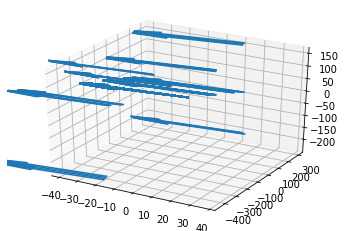

In [33]:
#This Surf function 
#entirely works to plot surfaces where in Z is a dependent variable of
#X and Y
#Leading to generate Meshgrids for the same, to lead a vector 

In [32]:
ax.plot_surface(UVM1,UVM2,UVM3,cmap=cm.coolwarm,linewidth=5,antialiased=False)

In [38]:
i = 1
j = 2
B_1_x = (P[i-1][a1], P[j-1][a1],P_f[i-1][a1],P_f[j-1][a1])
B_1_y = np.array((P[i-1][a2], P[j-1][a2],P_f[i-1][a2],P_f[j-1][a2]))
B_1_z = (P[i-1][a3], P[j-1][a3],P_f[i-1][a3],P_f[j-1][a3])
MB1 = np.matmul(M_Cubic,B_1_x)
MB2 = np.matmul(M_Cubic,B_1_y)
MB3 = np.matmul(M_Cubic,B_1_z)
UMB1 = np.matmul(U,MB1)
UMB2 = np.matmul(U,MB2)
UMB3 = np.matmul(U,MB3)

i = 2
j = 3
B_1_x = np.array((P[i-1][a1], [P[j-1][a1]],[P_f[i-1][a1]],[P_f[j-1][a1]]))
B_1_y = ([P[i-1][a2]], [P[j-1][a2]],[P_f[i-1][a2]],[P_f[j-1][a2]])
B_1_z = ([P[i-1][a3]], [P[j-1][a3]],[P_f[i-1][a3]],[P_f[j-1][a3]])
MB1 = np.matmul(M_Cubic,B_1_x)
MB2 = np.matmul(M_Cubic,B_1_y)
MB3 = np.matmul(M_Cubic,B_1_z)
UMB1 = UMB1 + np.matmul(U,MB1)
UMB2 = UMB2 + np.matmul(U,MB2)
UMB3 = UMB3 + np.matmul(U,MB3)

ValueError: shapes (4,4) and (4,1,1) not aligned: 4 (dim 1) != 1 (dim 1)

In [ ]:
i = 4
j = 5
B_2_x = ([x[i-1]], [x[j-1]],[P_f[i-1][a1]],[P_f[j-1][a1]])
B_2_y = ([y[i-1]], [y[j-1]],[P_f[i-1][a2]],[P_f[j-1][a2]])
B_2_z = ([z[i-1]], [z[j-1]],[P_f[i-1][a3]],[P_f[j-1][a3]])
MB4 = np.matmul(M_Cubic,B_2_x)
MB5 = np.matmul(M_Cubic,B_2_y)
MB6 = np.matmul(M_Cubic,B_2_z)
UMB4 = np.matmul(U,MB4)
UMB5 = np.matmul(U,MB5)
UMB6 = np.matmul(U,MB6)

i = 5
j = 6
B_2_x = ([x[i-1]], [x[j-1]],[P_f[i-1][a1]],[P_f[j-1][a1]])
B_2_y = ([y[i-1]], [y[j-1]],[P_f[i-1][a2]],[P_f[j-1][a2]])
B_2_z = ([z[i-1]], [z[j-1]],[P_f[i-1][a3]],[P_f[j-1][a3]])
MB4 = np.matmul(M_Cubic,B_2_x)
MB5 = np.matmul(M_Cubic,B_2_y)
MB6 = np.matmul(M_Cubic,B_2_z)
UMB4 = UMB4 + np.matmul(U,MB4)
UMB5 = UMB5 + np.matmul(U,MB5)
UMB6 = UMB6 + np.matmul(U,MB6)

In [ ]:
i = 7
j = 8
B_3_x = ([x[i-1]], [x[j-1]],[P_f[i-1][a1]],[P_f[j-1][a1]])
B_3_y = ([y[i-1]], [y[j-1]],[P_f[i-1][a2]],[P_f[j-1][a2]])
B_3_z = ([z[i-1]], [z[j-1]],[P_f[i-1][a3]],[P_f[j-1][a3]])
MB7 = np.matmul(M_Cubic,B_3_x)
MB8 = np.matmul(M_Cubic,B_3_y)
MB9 = np.matmul(M_Cubic,B_3_z)
UMB7 = np.matmul(U,MB7)
UMB8 = np.matmul(U,MB8)
UMB9 = np.matmul(U,MB9)
i = 8
j = 9
B_3_x = ([x[i-1]], [x[j-1]],[P_f[i-1][a1]],[P_f[j-1][a1]])
B_3_y = ([y[i-1]], [y[j-1]],[P_f[i-1][a2]],[P_f[j-1][a2]])
B_3_z = ([z[i-1]], [z[j-1]],[P_f[i-1][a3]],[P_f[j-1][a3]])
MB7 = np.matmul(M_Cubic,B_3_x)
MB8 = np.matmul(M_Cubic,B_3_y)
MB9 = np.matmul(M_Cubic,B_3_z)
UMB7 = UMB7 + np.matmul(U,MB7)
UMB8 = UMB8 + np.matmul(U,MB8)
UMB9 = UMB9 + np.matmul(U,MB9)
U.shape

In [ ]:
i = 1
j = 4
B_4_x = ([x[i-1]], [x[j-1]],[P_g[i-1][a1]],[P_g[j-1][a1]])
B_4_y = ([y[i-1]], [y[j-1]],[P_g[i-1][a2]],[P_g[j-1][a2]])
B_4_z = ([z[i-1]], [z[j-1]],[P_g[i-1][a3]],[P_g[j-1][a3]])
MB10 = np.matmul(M_Cubic,B_4_x)
MB11 = np.matmul(M_Cubic,B_4_y)
MB12 = np.matmul(M_Cubic,B_4_z)
UMB10 = np.matmul(U1,MB10)
UMB11 = np.matmul(U1,MB11)
UMB12 = np.matmul(U1,MB12)
i = 4
j = 7
B_4_x = ([x[i-1]], [x[j-1]],[P_g[i-1][a1]],[P_g[j-1][a1]])
B_4_y = ([y[i-1]], [y[j-1]],[P_g[i-1][a2]],[P_g[j-1][a2]])
B_4_z = ([z[i-1]], [z[j-1]],[P_g[i-1][a3]],[P_g[j-1][a3]])
MB10 = np.matmul(M_Cubic,B_4_x)
MB11 = np.matmul(M_Cubic,B_4_y)
MB12 = np.matmul(M_Cubic,B_4_z)
UMB10 = UMB10 + np.matmul(U1,MB10)
UMB11 = UMB11 + np.matmul(U1,MB11)
UMB12 = UMB12 + np.matmul(U1,MB12)

In [ ]:
i = 2
j = 5
B_6_x = ([x[i-1]], [x[j-1]],[P_g[i-1][a1]],[P_g[j-1][a1]])
B_6_y = ([y[i-1]], [y[j-1]],[P_g[i-1][a2]],[P_g[j-1][a2]])
B_6_z = ([z[i-1]], [z[j-1]],[P_g[i-1][a3]],[P_g[j-1][a3]])
MB13 = np.matmul(M_Cubic,B_6_x)
MB14 = np.matmul(M_Cubic,B_6_y)
MB15 = np.matmul(M_Cubic,B_6_z)
UMB13 = np.matmul(U1,MB13)
UMB14 = np.matmul(U1,MB14)
UMB15 = np.matmul(U1,MB15)
i = 5
j = 8
B_6_x = ([x[i-1]], [x[j-1]],[P_g[i-1][a1]],[P_g[j-1][a1]])
B_6_y = ([y[i-1]], [y[j-1]],[P_g[i-1][a2]],[P_g[j-1][a2]])
B_6_z = ([z[i-1]], [z[j-1]],[P_g[i-1][a3]],[P_g[j-1][a3]])
MB13 = np.matmul(M_Cubic,B_6_x)
MB14 = np.matmul(M_Cubic,B_6_y)
MB15 = np.matmul(M_Cubic,B_6_z)
UMB13 = UMB13 + np.matmul(U1,MB13)
UMB14 = UMB14 + np.matmul(U1,MB14)
UMB15 = UMB15 + np.matmul(U1,MB15)

In [ ]:
i = 3
j = 6
B_5_x = ([x[i-1]], [x[j-1]],[P_g[i-1][a1]],[P_g[j-1][a1]])
B_5_y = ([y[i-1]], [y[j-1]],[P_g[i-1][a2]],[P_g[j-1][a2]])
B_5_z = ([z[i-1]], [z[j-1]],[P_g[i-1][a3]],[P_g[j-1][a3]])
MB16 = np.matmul(M_Cubic,B_5_x)
MB17 = np.matmul(M_Cubic,B_5_y)
MB18 = np.matmul(M_Cubic,B_5_z)
UMB16 = np.matmul(U,MB16)
UMB17 = np.matmul(U,MB17)
UMB18 = np.matmul(U,MB18)

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(UMB1,UMB2,UMB3,marker='.',s=100,c="red")
ax.scatter(UMB4,UMB5,UMB6,marker='.',s=100,c="blue")
ax.scatter(UMB7,UMB8,UMB9,marker='.',s=100,c="green")
ax.scatter(UMB10,UMB11,UMB12,marker='.',s=100,c="black")
ax.scatter(UMB13,UMB14,UMB15,marker='.',s=100,c="red")
#ax.scatter(UMB16,UMB17,UMB18,marker='.',s=100,c="orange")

In [ ]:
#triang= mtri.Triangulation(F_x[1:20,1:10],F_y[1:20,1:10])
#fig = plt.figure()
#ax = fig.add_subplot(222,projection='3d')
#F_x,F_y = np.meshgrid(F_x,F_y)
#F_z = np.meshgrid(F_z[1:20,1:10])
#ax.plot_trisurf(triang,F_z,cmap='jet')
#ax.scatter(UVM1[1:20,1:20],UVM2[1:20,1:20],UVM3[1:20,1:20],marker='.',s=100,c="black")
#s2 = [ax.scatter(UVM4,UVM5,UVM6,marker='.',s=100,c="red")]
#s3 = [ax.scatter(UVM7,UVM8,UVM9,marker='.',s=100,c="blue")]
#s4 = [ax.scatter(UVM10,UVM11,UVM12,marker='.',s=100,c="green")]
#UVM1.shape
#ax.view_init(elev=60,azim=-45)

#Collection of Lines (2D Plane)
#ax.plot(UVM1[1:90,1:90],UVM2[1:90,1:90], c="black")
#ax.plot(UVM4[1:90,1:90],UVM5[1:90,1:90], c="red")
#ax.plot(UVM7[1:90,1:90],UVM8[1:90,1:90], c="blue")
#ax.plot(UVM10[1:90,1:90],UVM11[1:90,1:90], c="green")